# **ML IA 2- Fake news detection**

Group No. 6

Team members:

*   Purvi Harniya, 1814023 
*   Neelay Jagani, 1814024
*   Esha Gupta, 1814025

Dataset used - ISOT Dataset - https://drive.google.com/drive/folders/11DVh7akpXvzakGhVdGhBQR_kfsDdbmNZ?usp=sharing  
Dataset's official link- https://www.uvic.ca/ecs/ece/isot/datasets/fake-news/index.php <br>
Algorithmic comparison - Logistic regression, ADA, PAC, XGBoost, Random Forest, Naive Bayes, Decision Tree, SVM, RNN



## Importing the required libraries

In [1]:
#dataset handling and operations
from google.colab import drive  
import re,string,unicodedata
import numpy as np 
import pandas as pd

#visualization
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline 
plt.style.use('bmh')
from wordcloud import WordCloud, STOPWORDS 

#nlp pre-processing
from sklearn.utils import shuffle
import nltk
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from nltk.stem import WordNetLemmatizer
from nltk.stem.porter import PorterStemmer
from nltk.corpus import wordnet 

#vectorizers and splitting
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfTransformer
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelBinarizer

#models
from sklearn.linear_model import LogisticRegression
from xgboost import XGBClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn import svm,naive_bayes
from sklearn.linear_model import PassiveAggressiveClassifier
from sklearn.ensemble import AdaBoostClassifier 

#metrics 
from sklearn.metrics import confusion_matrix,accuracy_score,classification_report
from sklearn.metrics import plot_confusion_matrix,precision_score,f1_score,recall_score,plot_roc_curve

#for rnn-lstm
import tensorflow as tf
from tensorflow.keras.preprocessing.text import Tokenizer

In [2]:
nltk.download('stopwords')
nltk.download('punkt')
nltk.download('wordnet')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Unzipping corpora/wordnet.zip.


True

## Loading the datasets from Google Drive

In [3]:
drive.mount('/content/drive')

Mounted at /content/drive


In [4]:
%cd /content/drive/My Drive/fakenews/

/content/drive/My Drive/fakenews


In [5]:
!ls

Fake.csv  True.csv


## Reading the input CSV files

In [6]:
fake_df = pd.read_csv('Fake.csv')
true_df = pd.read_csv('True.csv')

In [7]:
fake_df.shape

(23481, 4)

In [8]:
true_df.shape

(21417, 4)

In [9]:
fake_df.sample(5)

,title,text,subject,date
18161,"COLLEGE FACES $250,000 FINE For Punishing Pray...",When Columbia University s internal investigat...,left-news,"Aug 12, 2017"
12345,#HAMILTON Star Makes Jokes On Twitter About “B...,When not lecturing the Trump Administration fo...,politics,"Nov 20, 2016"
21355,COMMUNISM 101: CA School District Bans All Dra...,We certainly don t want to do anything that mi...,left-news,"Nov 9, 2015"
17032,FBI SAYS DEM PRESIDENTIAL FRONTRUNNER HILLARY ...,The corrupt covering for the corrupt. Chicago ...,Government News,"Oct 16, 2015"
10360,US POSTAL SERVICE IN HOT WATER: Broke Law Allo...,How corrupt is this? The USPS allowed employee...,politics,"Jul 19, 2017"


In [10]:
true_df.sample(5)

,title,text,subject,date
10019,"In record year for political ads, media buyers...",(Reuters) - Media buyers expect record politic...,politicsNews,"April 1, 2016"
15120,Little hope of peace talks as renewed fighting...,KAMPALA (Reuters) - As fresh fighting looms in...,worldnews,"November 10, 2017"
16710,Factbox: U.S.-Pakistan ties falter as Afghanis...,ISLAMABAD (Reuters) - Ties between the United ...,worldnews,"October 23, 2017"
15505,Trump calls for worldwide action against North...,SEOUL (Reuters) - U.S. President Donald Trump ...,worldnews,"November 7, 2017"
16499,U.N. nuclear chief to visit Iran this weekend,VIENNA (Reuters) - The head of the United Nati...,worldnews,"October 25, 2017"


## Checking for null values

In [11]:
fake_df.isna().sum()

title      0
text       0
subject    0
date       0
dtype: int64

In [12]:
true_df.isna().sum()

title      0
text       0
subject    0
date       0
dtype: int64

## Dropping the unrequired columns 

In [13]:
fake_df.drop(['subject','date'],axis=1,inplace=True)

In [14]:
true_df.drop(['subject','date'],axis=1,inplace=True)

## Checking the distribution of fake news vs true news

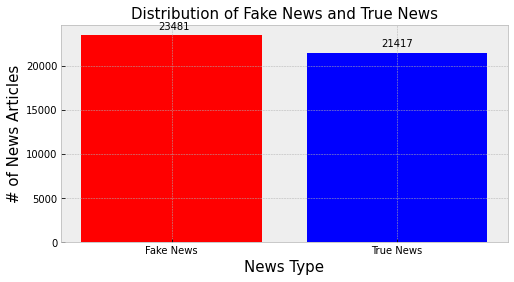

In [15]:
plt.figure(figsize=(8, 4))
plt.bar('Fake News', len(fake_df), color='red')
plt.bar('True News', len(true_df), color='blue')
plt.title('Distribution of Fake News and True News', size=15)
plt.xlabel('News Type', size=15)
plt.ylabel('# of News Articles', size=15)
plt.annotate(len(fake_df), # this is the text
                (0.01,23000), # these are the coordinates to position the label
                textcoords="offset points", # how to position the text
                xytext=(0,10), # distance from text to points (x,y)
                ha='center')
plt.annotate(len(true_df), # this is the text
                (1,21000), # these are the coordinates to position the label
                textcoords="offset points", # how to position the text
                xytext=(0,10), # distance from text to points (x,y)
                ha='center')
plt.show()

## Concatenating the title and text columns

In [16]:
fake_df['news'] = fake_df['title'] + fake_df['text']
fake_df['label'] = 0
fake_df.drop(['title','text'], axis=1, inplace=True)

In [17]:
true_df['news'] = true_df['title'] + true_df['text']
true_df['label'] = 1
true_df.drop(['title','text'], axis=1, inplace=True)

In [18]:
fake_df.sample(2)

,news,label
7958,WATCH: The Top Four Reasons Ted Cruz Is More ...,0
3773,Lewandowski Admits It: FBI Comey’s Letter Won...,0


In [19]:
true_df.sample(2)

,news,label
6252,UK's Johnson raises hackles over WW2 'punishme...,1
7757,U.S. partnership with Turkey in Islamic State ...,1


## Visualizing the news using wordcloud

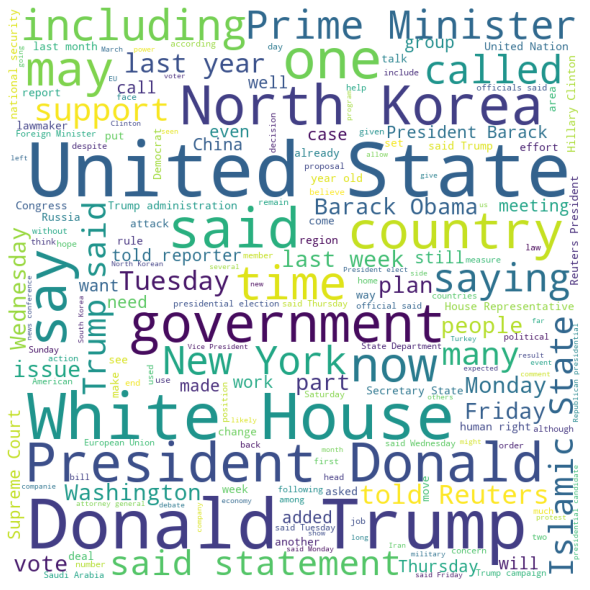

In [20]:
stopwords = set(STOPWORDS) 

words_li_true = list(true_df['news'])
string_of_words_true = " ".join(words_li_true)

wordcloud = WordCloud(width = 800, height = 800, 
                background_color ='white', 
                stopwords = stopwords, 
                min_font_size = 10).generate(string_of_words_true) 
  
# plot the WordCloud image                        
plt.figure(figsize = (8, 8), facecolor = None) 
plt.imshow(wordcloud) 
plt.axis("off") 
plt.tight_layout(pad = 0) 
  
plt.show()

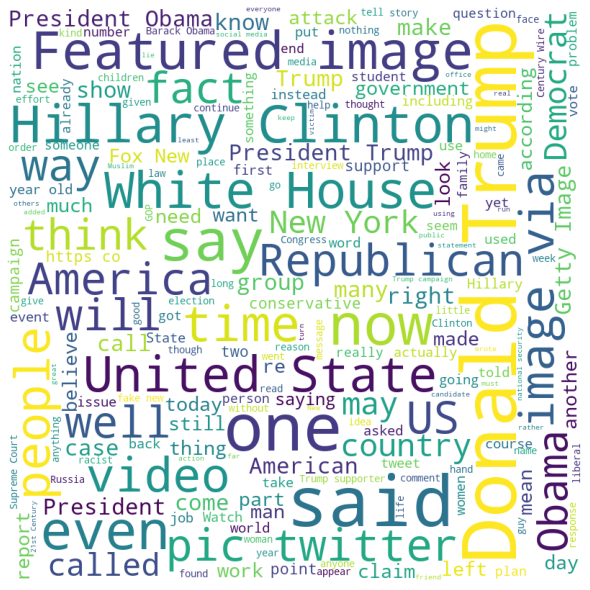

In [21]:
words_li_fake = list(fake_df['news'])
string_of_words_fake = " ".join(words_li_fake)

wordcloud = WordCloud(width = 800, height = 800, 
                background_color ='white', 
                stopwords = stopwords, 
                min_font_size = 10).generate(string_of_words_fake) 
  
# plot the WordCloud image                        
plt.figure(figsize = (8, 8), facecolor = None) 
plt.imshow(wordcloud) 
plt.axis("off") 
plt.tight_layout(pad = 0) 
  
plt.show()

## Concatenating the true and fake news datasets

In [22]:
df = pd.concat([fake_df, true_df], ignore_index=True, sort=False)

In [23]:
df.sample(5)

,news,label
33892,Senate banking panel approves Szubin for key s...,1
34593,Senator Markey places hold on Obama's nominee ...,1
42482,Myanmar army Facebook posts covering key perio...,1
18660,TIFFANY & CO. TAKES BIG RISK…Sides AGAINST Tru...,0
32306,Options market signals little fear of election...,1


## Using NLP to pre-process the news text

In [24]:
stop_words = nltk.corpus.stopwords.words('english')

In [25]:
lemmatizer=WordNetLemmatizer()
for index,row in df.iterrows():
    filter_sentence = ''
    
    sentence = row['news']
    sentence = re.sub(r'[^\w\s]','',sentence) #cleaning
    
    words = nltk.word_tokenize(sentence) #tokenization
    
    words = [w for w in words if not w in stop_words]  #stopwords removal
    
    for word in words:
        filter_sentence = filter_sentence + ' ' + str(lemmatizer.lemmatize(word)).lower() #try with stemming
        
    df.loc[index,'news'] = filter_sentence

In [26]:
df.sample(5)

,news,label
4175,heres the new way trump is scamming republica...,0
2325,former secretary of state drops massive shock...,0
19772,watch hillary laugh when trump mentions gays ...,0
21698,prolife license plate deemed patently offensi...,0
29451,exclusive expecting trump action us suspends ...,1


In [27]:
count_vectorizer = CountVectorizer()
count_vectorizer.fit_transform(df['news'])
freq_term_matrix = count_vectorizer.transform(df['news'])
tfidf = TfidfTransformer(norm="l2")
tfidf.fit(freq_term_matrix)
tf_idf_matrix = tfidf.fit_transform(freq_term_matrix)

In [80]:
pd.DataFrame(print(freq_term_matrix))

  (0, 5142)	1
  (0, 5763)	1
  (0, 6371)	1
  (0, 6577)	2
  (0, 6587)	1
  (0, 6979)	1
  (0, 7344)	1
  (0, 7498)	2
  (0, 7630)	2
  (0, 7668)	1
  (0, 7670)	1
  (0, 7679)	3
  (0, 9595)	13
  (0, 12832)	1
  (0, 13858)	1
  (0, 15435)	1
  (0, 19690)	1
  (0, 19702)	1
  (0, 20893)	1
  (0, 21534)	1
  (0, 21794)	1
  (0, 22191)	3
  (0, 22331)	1
  (0, 22403)	1
  (0, 23154)	1
  :	:
  (44897, 208333)	2
  (44897, 208553)	1
  (44897, 209803)	1
  (44897, 210916)	1
  (44897, 211481)	1
  (44897, 212098)	1
  (44897, 212196)	1
  (44897, 213244)	1
  (44897, 216032)	1
  (44897, 216270)	1
  (44897, 218042)	2
  (44897, 220021)	1
  (44897, 223180)	1
  (44897, 223510)	3
  (44897, 223569)	1
  (44897, 226313)	2
  (44897, 226502)	1
  (44897, 228050)	2
  (44897, 228294)	1
  (44897, 230042)	1
  (44897, 231918)	1
  (44897, 236162)	1
  (44897, 237427)	1
  (44897, 243790)	3
  (44897, 245160)	1


""


In [81]:
pd.DataFrame(print(tf_idf_matrix))

  (0, 245518)	0.06791817718326232
  (0, 245325)	0.08412503657433881
  (0, 245160)	0.20048706785446999
  (0, 245116)	0.07266367527253345
  (0, 244156)	0.02727099546360379
  (0, 243817)	0.022951077083622266
  (0, 243120)	0.018832852544379147
  (0, 243023)	0.023435822729746203
  (0, 242863)	0.03291994165350629
  (0, 242193)	0.16371757833191053
  (0, 241114)	0.02783910197282644
  (0, 241004)	0.028191649671708067
  (0, 240657)	0.023304634043558554
  (0, 240187)	0.022398668846519167
  (0, 240176)	0.07543961370200095
  (0, 240166)	0.052386074171907625
  (0, 239941)	0.07543961370200095
  (0, 237427)	0.03373800689653733
  (0, 236291)	0.02771907362362119
  (0, 231555)	0.025522819510195055
  (0, 227124)	0.02923553694055433
  (0, 227077)	0.07948340142277982
  (0, 225207)	0.08205751265650113
  (0, 219557)	0.0165138469157832
  (0, 219392)	0.03212885506478138
  :	:
  (44897, 55699)	0.08372853864339365
  (44897, 54830)	0.08702392150836498
  (44897, 53606)	0.03956622282411075
  (44897, 53329)	0.2424475

""


## Splitting the dataset into test and train

In [28]:
X_train, X_test, y_train, y_test = train_test_split(tf_idf_matrix, df['label'], random_state=0)

## Logistic Regression

In [29]:
logistic_regression= LogisticRegression()
logistic_regression.fit(X_train,y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [30]:
predictions_lr=logistic_regression.predict(X_test)

print("LOGISTIC REGRESSION: PERFORMANCE METRICS\n\n")

accuracy_logistic = accuracy_score(y_test, predictions_lr)
print("Accuracy: %.2f%%" % (accuracy_logistic * 100.0))

precision_logistic = precision_score(y_test, predictions_lr, average=None)
print("Precision: %.2f%%" % (precision_logistic[1] * 100.0))

f1score_logistic= f1_score(y_test, predictions_lr, average=None)
print("F1 Score: %.2f%%" % (f1score_logistic[1] * 100.0))

recall_logistic = recall_score(y_test, predictions_lr, average=None)
print("Recall: %.2f%%" % (recall_logistic[1] * 100.0))

LOGISTIC REGRESSION: PERFORMANCE METRICS


Accuracy: 98.80%
Precision: 98.69%
F1 Score: 98.74%
Recall: 98.78%



Confusion matrix, without normalization
[[5806   70]
 [  65 5284]]

Normalized confusion matrix
[[0.99 0.01]
 [0.01 0.99]]


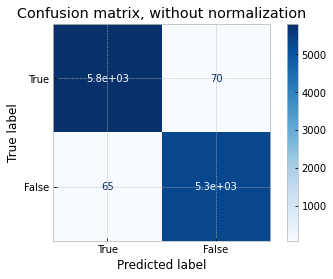

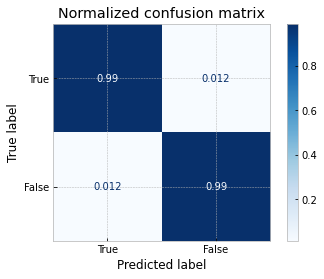

In [31]:
class_names = ['True', 'False']

np.set_printoptions(precision=2)

# Plot non-normalized confusion matrix
titles_options = [("Confusion matrix, without normalization", None),
                  ("Normalized confusion matrix", 'true')]
for title, normalize in titles_options:
    disp = plot_confusion_matrix(logistic_regression, X_test, y_test,
                                 display_labels=class_names,
                                 cmap=plt.cm.Blues,
                                 normalize=normalize)
    disp.ax_.set_title(title)

    print()
    print(title)
    print(disp.confusion_matrix)

plt.show()

## ADA

In [32]:
abc = AdaBoostClassifier(n_estimators=50,
                         learning_rate=1)
# Train Adaboost Classifer
ada_classifier = abc.fit(X_train, y_train)

In [33]:
#Predict the response for test dataset
predictions_ada = ada_classifier.predict(X_test)

print("ADA BOOT CLASSIFIER: PERFORMANCE METRICS\n\n")

accuracy_ada = accuracy_score(y_test, predictions_ada)
print("Accuracy: %.2f%%" % (accuracy_ada * 100.0))

precision_ada = precision_score(y_test, predictions_ada, average=None)
print("Precision: %.2f%%" % (precision_ada[1] * 100.0))

f1score_ada = f1_score(y_test, predictions_ada, average=None)
print("F1 Score: %.2f%%" % (f1score_ada[1] * 100.0))

recall_ada = recall_score(y_test, predictions_ada, average=None)
print("Recall: %.2f%%" % (recall_ada[1] * 100.0))

ADA BOOT CLASSIFIER: PERFORMANCE METRICS


Accuracy: 98.82%
Precision: 98.77%
F1 Score: 98.77%
Recall: 98.77%



Confusion matrix, without normalization
[[5810   66]
 [  66 5283]]

Normalized confusion matrix
[[0.99 0.01]
 [0.01 0.99]]


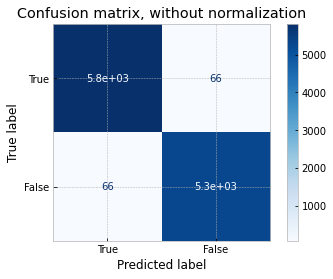

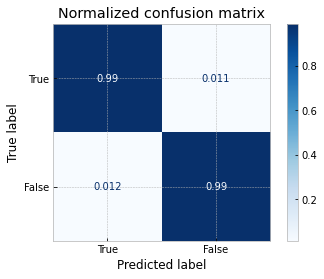

In [34]:
class_names = ['True', 'False']

np.set_printoptions(precision=2)

# Plot non-normalized confusion matrix
titles_options = [("Confusion matrix, without normalization", None),
                  ("Normalized confusion matrix", 'true')]
for title, normalize in titles_options:
    disp = plot_confusion_matrix(ada_classifier, X_test, y_test,
                                 display_labels=class_names,
                                 cmap=plt.cm.Blues,
                                 normalize=normalize)
    disp.ax_.set_title(title)
    
    print()
    print(title)
    print(disp.confusion_matrix)

plt.show()

## PAC

In [35]:
pac=PassiveAggressiveClassifier(max_iter=50)
pac_classifier = pac.fit(X_train,y_train)

In [36]:
#Predict the response for test dataset
predictions_pac = pac_classifier.predict(X_test)

print("PASSIVE AGGRESSIVE CLASSIFIER: PERFORMANCE METRICS\n\n")

accuracy_pac = accuracy_score(y_test, predictions_pac)
print("Accuracy: %.2f%%" % (accuracy_pac * 100.0))

precision_pac = precision_score(y_test, predictions_pac, average=None)
print("Precision: %.2f%%" % (precision_pac[1] * 100.0))

f1score_pac = f1_score(y_test, predictions_pac, average=None)
print("F1 Score: %.2f%%" % (f1score_pac[1] * 100.0))

recall_pac = recall_score(y_test, predictions_pac, average=None)
print("Recall: %.2f%%" % (recall_pac[1] * 100.0))

PASSIVE AGGRESSIVE CLASSIFIER: PERFORMANCE METRICS


Accuracy: 99.57%
Precision: 99.50%
F1 Score: 99.55%
Recall: 99.61%



Confusion matrix, without normalization
[[5849   27]
 [  21 5328]]

Normalized confusion matrix
[[1. 0.]
 [0. 1.]]


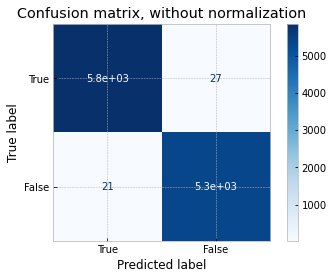

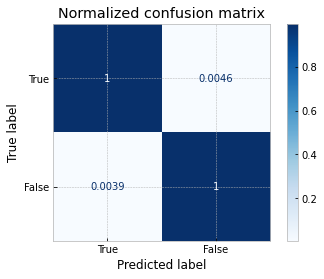

In [37]:
class_names = ['True', 'False']

np.set_printoptions(precision=2)

# Plot non-normalized confusion matrix
titles_options = [("Confusion matrix, without normalization", None),
                  ("Normalized confusion matrix", 'true')]
for title, normalize in titles_options:
    disp = plot_confusion_matrix(pac_classifier, X_test, y_test,
                                 display_labels=class_names,
                                 cmap=plt.cm.Blues,
                                 normalize=normalize)
    disp.ax_.set_title(title)
    
    print()
    print(title)
    print(disp.confusion_matrix)

plt.show()

## XGBoost

In [38]:
xgb_classifier = XGBClassifier()

xgb_classifier.fit(X_train, y_train)

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, gamma=0,
              learning_rate=0.1, max_delta_step=0, max_depth=3,
              min_child_weight=1, missing=None, n_estimators=100, n_jobs=1,
              nthread=None, objective='binary:logistic', random_state=0,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=None,
              silent=None, subsample=1, verbosity=1)

In [39]:
predictions_xgb = xgb_classifier.predict(X_test)
predictions_xgbf = [round(value) for value in predictions_xgb]
# evaluate predictions

print("XG BOOST: PERFORMANCE METRICS\n\n")

accuracy_xgb = accuracy_score(y_test, predictions_xgbf)
print("Accuracy: %.2f%%" % (accuracy_xgb * 100.0))

precision_xgb = precision_score(y_test, predictions_xgbf, average=None)
print("Precision: %.2f%%" % (precision_xgb[1] * 100.0))

f1score_xgb = f1_score(y_test, predictions_xgbf, average=None)
print("F1 Score: %.2f%%" % (f1score_xgb[1] * 100.0))

recall_xgb = recall_score(y_test, predictions_xgbf, average=None)
print("Recall: %.2f%%" % (recall_xgb[1] * 100.0))

XG BOOST: PERFORMANCE METRICS


Accuracy: 99.05%
Precision: 99.43%
F1 Score: 99.00%
Recall: 98.56%



Confusion matrix, without normalization
[[5846   30]
 [  77 5272]]

Normalized confusion matrix
[[0.99 0.01]
 [0.01 0.99]]


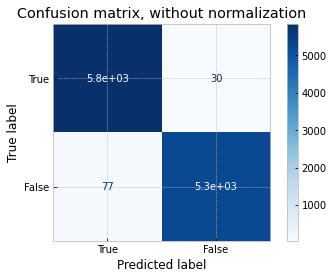

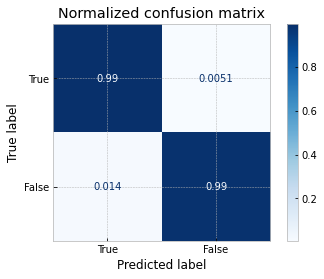

In [40]:
class_names = ['True', 'False']

np.set_printoptions(precision=2)

# Plot non-normalized confusion matrix
titles_options = [("Confusion matrix, without normalization", None),
                  ("Normalized confusion matrix", 'true')]
for title, normalize in titles_options:
    disp = plot_confusion_matrix(xgb_classifier, X_test, y_test,
                                 display_labels=class_names,
                                 cmap=plt.cm.Blues,
                                 normalize=normalize)
    disp.ax_.set_title(title)
    
    print()
    print(title)
    print(disp.confusion_matrix)

plt.show()

## Random Forest

In [41]:
# Instantiate model with 30 decision trees
rf = RandomForestClassifier(n_estimators = 30)
# Train the model on training data
rf.fit(X_train, y_train)

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=30,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

In [42]:
# make predictions for test data
y_pred_rf = rf.predict(X_test)
predictions_rf = [round(value) for value in y_pred_rf]

print("RANDOM FOREST: PERFORMANCE METRICS\n\n")

accuracy_rf = accuracy_score(y_test, predictions_rf)
print("Accuracy: %.2f%%" % (accuracy_rf * 100.0))

precision_rf = precision_score(y_test, predictions_rf, average=None)
print("Precision: %.2f%%" % (precision_rf[1] * 100.0))

f1score_rf = f1_score(y_test, predictions_rf, average=None)
print("F1 Score: %.2f%%" % (f1score_rf[1] * 100.0))

recall_rf = recall_score(y_test, predictions_rf, average=None)
print("Recall: %.2f%%" % (recall_rf[1] * 100.0))

RANDOM FOREST: PERFORMANCE METRICS


Accuracy: 98.47%
Precision: 98.68%
F1 Score: 98.39%
Recall: 98.09%


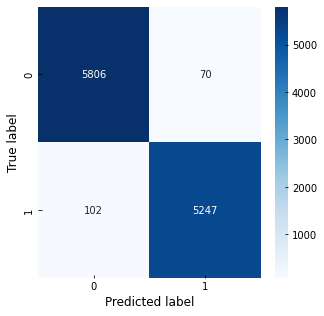

In [43]:
cm = confusion_matrix(y_test, predictions_rf)
f, ax = plt.subplots(figsize = (5,5))
sns.heatmap(cm, annot = True, fmt =".0f", ax=ax,cmap=plt.cm.Blues)
plt.xlabel("Predicted label")
plt.ylabel("True label")
plt.show()

In [84]:
print("Confusion Matrix")
print(cm)

Confusion Matrix
[[5806   70]
 [ 102 5247]]


## Naive Bayes

In [44]:
# fit the training dataset on the NB classifier
Naive = naive_bayes.MultinomialNB()
naive_classifier = Naive.fit(X_train,y_train)

In [45]:
# make predictions for test data
predictions_NB = Naive.predict(X_test)

print("NAIVE BAYES: PERFORMANCE METRICS\n\n")

accuracy_nb = accuracy_score(y_test, predictions_NB)
print("Accuracy: %.2f%%" % (accuracy_nb * 100.0))

precision_nb = precision_score(y_test, predictions_NB, average=None)
print("Precision: %.2f%%" % (precision_nb[1] * 100.0))

f1score_nb = f1_score(y_test, predictions_NB, average=None)
print("F1 Score: %.2f%%" % (f1score_nb[1] * 100.0))

recall_nb = recall_score(y_test, predictions_NB, average=None)
print("Recall: %.2f%%" % (recall_nb[1] * 100.0))

NAIVE BAYES: PERFORMANCE METRICS


Accuracy: 95.23%
Precision: 95.11%
F1 Score: 94.99%
Recall: 94.88%



Confusion matrix, without normalization
[[5615  261]
 [ 274 5075]]

Normalized confusion matrix
[[0.96 0.04]
 [0.05 0.95]]


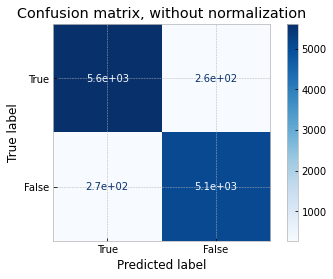

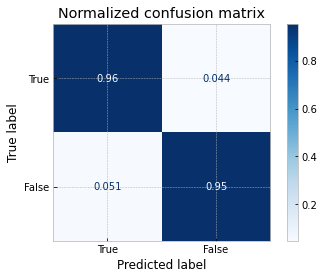

In [46]:
class_names = ['True', 'False']

np.set_printoptions(precision=2)

# Plot non-normalized confusion matrix
titles_options = [("Confusion matrix, without normalization", None),
                  ("Normalized confusion matrix", 'true')]
for title, normalize in titles_options:
    disp = plot_confusion_matrix(naive_classifier, X_test, y_test,
                                 display_labels=class_names,
                                 cmap=plt.cm.Blues,
                                 normalize=normalize)
    disp.ax_.set_title(title)
    
    print()
    print(title)
    print(disp.confusion_matrix)

plt.show()

## SVM

In [47]:
SVM = svm.SVC(C=1.0, kernel='linear', degree=3, gamma='auto')
svm_classifier = SVM.fit(X_train,y_train)

In [48]:
# make predictions for test data
predictions_SVM = SVM.predict(X_test)

print("SUPPORT VECTOR MACHINES: PERFORMANCE METRICS\n\n")

accuracy_svm = accuracy_score(y_test, predictions_SVM)
print("Accuracy: %.2f%%" % (accuracy_svm * 100.0))

precision_svm = precision_score(y_test, predictions_SVM, average=None)
print("Precision: %.2f%%" % (precision_svm[1] * 100.0))

f1score_svm = f1_score(y_test, predictions_SVM, average=None)
print("F1 Score: %.2f%%" % (f1score_svm[1] * 100.0))

recall_svm = recall_score(y_test, predictions_SVM, average=None)
print("Recall: %.2f%%" % (recall_svm[1] * 100.0))

SUPPORT VECTOR MACHINES: PERFORMANCE METRICS


Accuracy: 99.48%
Precision: 99.33%
F1 Score: 99.46%
Recall: 99.59%


Confusion matrix, without normalization
[[5840   36]
 [  22 5327]]
Normalized confusion matrix
[[0.99 0.01]
 [0.   1.  ]]


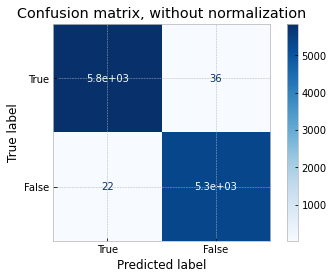

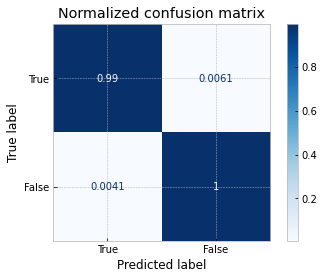

In [49]:
class_names = ['True', 'False']

np.set_printoptions(precision=2)

# Plot non-normalized confusion matrix
titles_options = [("Confusion matrix, without normalization", None),
                  ("Normalized confusion matrix", 'true')]
for title, normalize in titles_options:
    disp = plot_confusion_matrix(svm_classifier, X_test, y_test,
                                 display_labels=class_names,
                                 cmap=plt.cm.Blues,
                                 normalize=normalize)
    disp.ax_.set_title(title)

    print(title)
    print(disp.confusion_matrix)

plt.show()

## Decision Tree

In [50]:
dt_clf = DecisionTreeClassifier()

dt_clf = dt_clf.fit(X_train,y_train)

In [51]:
# make predictions for test data
predictions_dt = dt_clf.predict(X_test)

print("DECISION TREE: PERFORMANCE METRICS\n\n")

accuracy_dt = accuracy_score(y_test, predictions_dt)
print("Accuracy: %.2f%%" % (accuracy_dt * 100.0))

precision_dt = precision_score(y_test, predictions_dt, average=None)
print("Precision: %.2f%%" % (precision_dt[1] * 100.0))

f1score_dt = f1_score(y_test, predictions_dt, average=None)
print("F1 Score: %.2f%%" % (f1score_dt[1] * 100.0))

recall_dt = recall_score(y_test, predictions_dt, average=None)
print("Recall: %.2f%%" % (recall_dt[1] * 100.0))

DECISION TREE: PERFORMANCE METRICS


Accuracy: 98.58%
Precision: 98.67%
F1 Score: 98.51%
Recall: 98.35%



Confusion matrix, without normalization
[[5805   71]
 [  88 5261]]

Normalized confusion matrix
[[0.99 0.01]
 [0.02 0.98]]


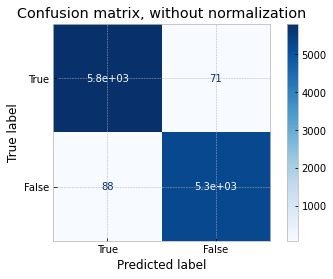

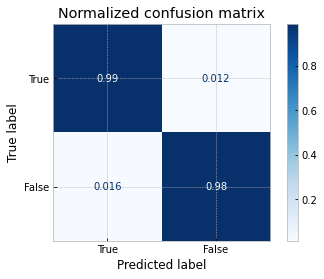

In [52]:
class_names = ['True', 'False']

np.set_printoptions(precision=2)

# Plot non-normalized confusion matrix
titles_options = [("Confusion matrix, without normalization", None),
                  ("Normalized confusion matrix", 'true')]
for title, normalize in titles_options:
    disp = plot_confusion_matrix(dt_clf, X_test, y_test,
                                 display_labels=class_names,
                                 cmap=plt.cm.Blues,
                                 normalize=normalize)
    disp.ax_.set_title(title)
    print()
    print(title)
    print(disp.confusion_matrix)

plt.show()

## RNN

In [53]:
#normalizing the textual data
import re

def normalize(data):
    normalized = []
    for i in data:
        i = i.lower()
        # get rid of urls
        i = re.sub('https?://\S+|www\.\S+', '', i)
        # get rid of non words and extra spaces
        i = re.sub('\\W', ' ', i)
        i = re.sub('\n', '', i)
        i = re.sub(' +', ' ', i)
        i = re.sub('^ ', '', i)
        i = re.sub(' $', '', i)
        normalized.append(i)
    return normalized

df['news'] = normalize(df['news'])

#after normalizing
df.sample(5)

,news,label
40730,china combat veteran close ally xi get promoti...,1
37596,exbosnian serb commander mladic convicted geno...,1
43034,czech ruling party say wage growth must priori...,1
1757,trump just called a fledgling dictator to cong...,0
32588,california legislature sends 1225 billion budg...,1


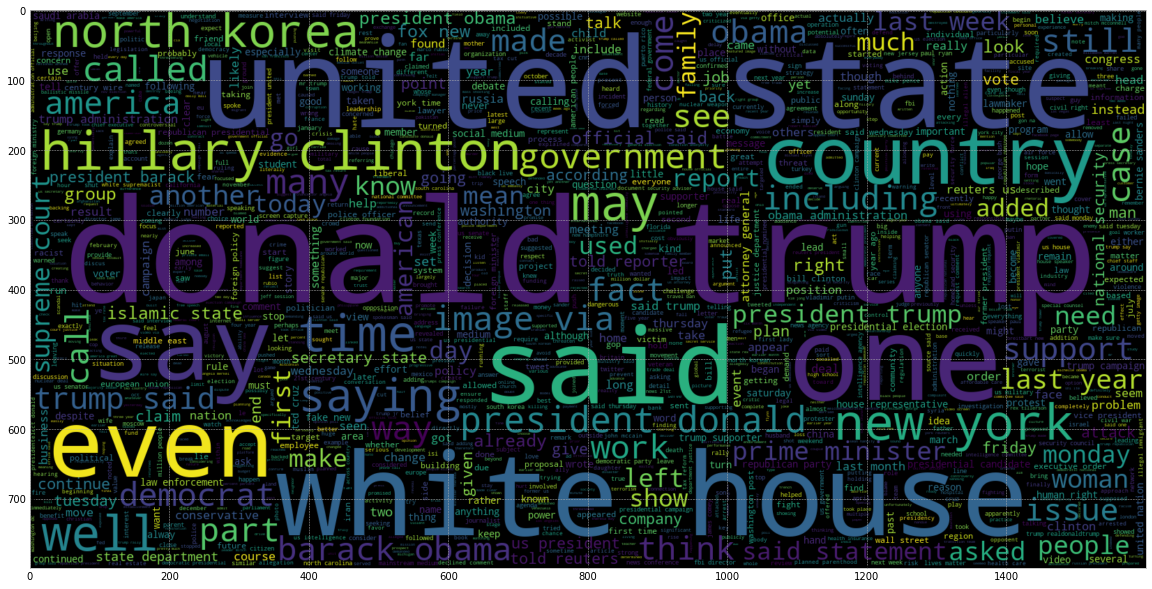

In [54]:
plt.figure(figsize = (20,20))
wc = WordCloud(max_words = 3000 , width = 1600 , height = 800 , stopwords = STOPWORDS).generate(" ".join(df.news))
plt.imshow(wc , interpolation = 'bilinear')

In [55]:
feature = df['news']
target = df['label']

x_train_rnn, x_test_rnn, y_train_rnn, y_test_rnn = train_test_split(feature, target, test_size=0.20, random_state=18)

In [56]:
tokenizer = Tokenizer(num_words=10000)
tokenizer.fit_on_texts(x_train_rnn)

In [57]:
x_train_rnn = tokenizer.texts_to_sequences(x_train_rnn)
x_test_rnn = tokenizer.texts_to_sequences(x_test_rnn)

In [58]:
x_train_rnn = tf.keras.preprocessing.sequence.pad_sequences(x_train_rnn, padding='post', maxlen=256)
x_test_rnn = tf.keras.preprocessing.sequence.pad_sequences(x_test_rnn, padding='post', maxlen=256)

In [59]:
model_rnn = tf.keras.Sequential([
    tf.keras.layers.Embedding(10000, 32),
    tf.keras.layers.Bidirectional(tf.keras.layers.LSTM(64,  return_sequences=True)),
    tf.keras.layers.Bidirectional(tf.keras.layers.LSTM(16)),
    tf.keras.layers.Dense(64, activation='relu'),
    tf.keras.layers.Dropout(0.5),
    tf.keras.layers.Dense(1)
])


model_rnn.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding (Embedding)       (None, None, 32)          320000    
                                                                 
 bidirectional (Bidirectiona  (None, None, 128)        49664     
 l)                                                              
                                                                 
 bidirectional_1 (Bidirectio  (None, 32)               18560     
 nal)                                                            
                                                                 
 dense (Dense)               (None, 64)                2112      
                                                                 
 dropout (Dropout)           (None, 64)                0         
                                                                 
 dense_1 (Dense)             (None, 1)                 6

In [60]:
model_rnn.compile(loss=tf.keras.losses.BinaryCrossentropy(from_logits=True),
              optimizer=tf.keras.optimizers.Adam(1e-4),
              metrics=['accuracy'])

history = model_rnn.fit(x_train_rnn, y_train_rnn, epochs=10,validation_split=0.1, batch_size=30, shuffle=True,) 

Epoch 1/10
1078/1078 [==============================] - 571s 521ms/step - loss: 0.2319 - accuracy: 0.8731 - val_loss: 0.0435 - val_accuracy: 0.9869
Epoch 2/10
1078/1078 [==============================] - 550s 511ms/step - loss: 0.0381 - accuracy: 0.9901 - val_loss: 0.0309 - val_accuracy: 0.9905
Epoch 3/10
1078/1078 [==============================] - 556s 516ms/step - loss: 0.0227 - accuracy: 0.9940 - val_loss: 0.0286 - val_accuracy: 0.9933
Epoch 4/10
1078/1078 [==============================] - 552s 512ms/step - loss: 0.0112 - accuracy: 0.9979 - val_loss: 0.0266 - val_accuracy: 0.9936
Epoch 5/10
1078/1078 [==============================] - 553s 513ms/step - loss: 0.0077 - accuracy: 0.9987 - val_loss: 0.0280 - val_accuracy: 0.9947
Epoch 6/10
1078/1078 [==============================] - 551s 512ms/step - loss: 0.0076 - accuracy: 0.9985 - val_loss: 0.0399 - val_accuracy: 0.9889
Epoch 7/10
1078/1078 [==============================] - 552s 512ms/step - loss: 0.0060 - accuracy: 0.9989 - val_

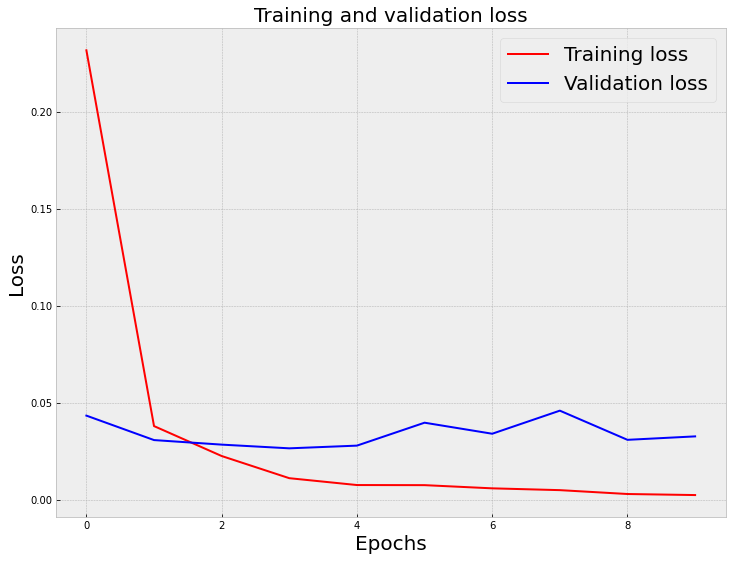

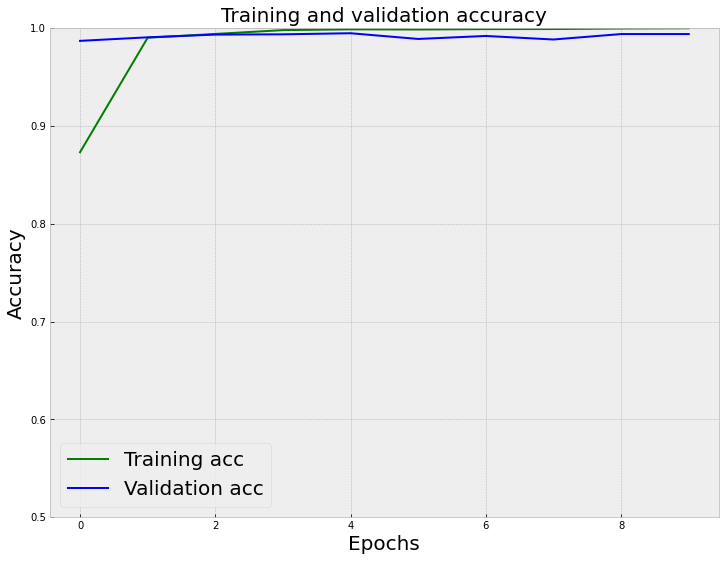

In [61]:
history_dict = history.history

acc = history_dict['accuracy']
val_acc = history_dict['val_accuracy']
loss = history_dict['loss']
val_loss = history_dict['val_loss']
epochs = history.epoch

plt.figure(figsize=(12,9))
plt.plot(epochs, loss, 'r', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss', size=20)
plt.xlabel('Epochs', size=20)
plt.ylabel('Loss', size=20)
plt.legend(prop={'size': 20})
plt.show()

plt.figure(figsize=(12,9))
plt.plot(epochs, acc, 'g', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Training and validation accuracy', size=20)
plt.xlabel('Epochs', size=20)
plt.ylabel('Accuracy', size=20)
plt.legend(prop={'size': 20})
plt.ylim((0.5,1))
plt.show()

In [62]:
model_rnn.evaluate(x_test_rnn, y_test_rnn)

281/281 [==============================] - 31s 110ms/step - loss: 0.0390 - accuracy: 0.9924


[0.039030157029628754, 0.9924275875091553]

In [63]:
pred = model_rnn.predict(x_test_rnn)

binary_predictions = []

for i in pred:
    if i >= 0.5:
        binary_predictions.append(1)
    else:
        binary_predictions.append(0) 

In [85]:
print("RNN: PERFORMANCE METRICS\n\n")

accuracy_rnn = accuracy_score(y_test_rnn, binary_predictions)
print("Accuracy: %.2f%%" % (accuracy_rnn * 100.0))

precision_rnn = precision_score(y_test_rnn, binary_predictions, average=None)
print("Precision: %.2f%%" % (precision_rnn[1] * 100.0))

f1score_rnn = f1_score(y_test_rnn, binary_predictions, average=None)
print("F1 Score: %.2f%%" % (f1score_rnn[1] * 100.0))

recall_rnn = recall_score(y_test_rnn, binary_predictions, average=None)
print("Recall: %.2f%%" % (recall_rnn[1] * 100.0))

RNN: PERFORMANCE METRICS


Accuracy: 99.24%
Precision: 99.49%
F1 Score: 99.21%
Recall: 98.93%


[Text(0, 0.5, '0'), Text(0, 1.5, '1')]

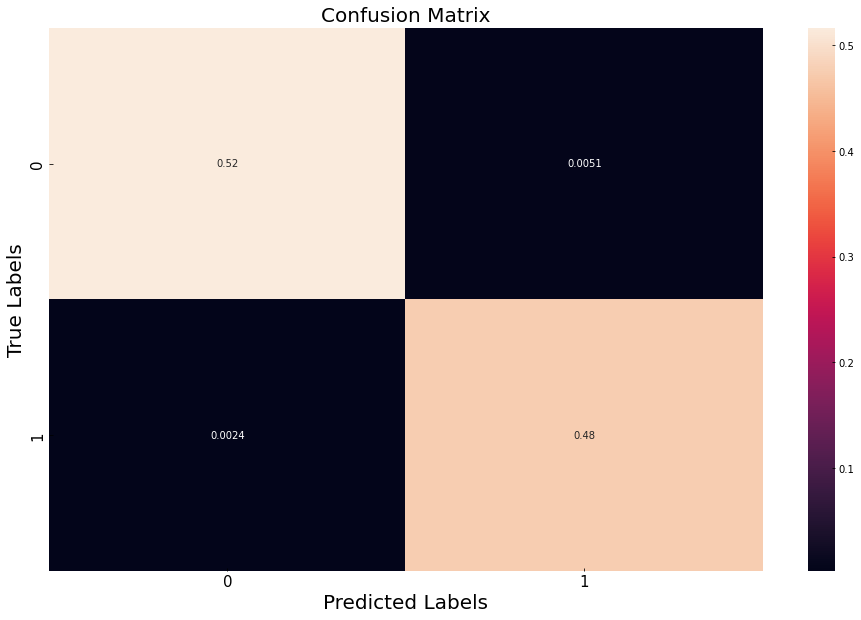

In [65]:
matrix = confusion_matrix(binary_predictions, y_test_rnn, normalize='all')
plt.figure(figsize=(16, 10))
ax= plt.subplot()
sns.heatmap(matrix, annot=True, ax = ax)

# labels, title and ticks
ax.set_xlabel('Predicted Labels', size=20)
ax.set_ylabel('True Labels', size=20)
ax.set_title('Confusion Matrix', size=20) 
ax.xaxis.set_ticklabels([0,1], size=15)
ax.yaxis.set_ticklabels([0,1], size=15)

In [86]:
print("Confusion Matrix")
print(matrix)

Confusion Matrix
[[0.52 0.01]
 [0.   0.48]]


## Comaring the models wrt performance

In [66]:
var_models = ['Logstic Regression', 'ADA', 'PAC', 'XGB','RF','Naive Bayes','SVM','DT','RNN']

var_accuracy = [accuracy_logistic,accuracy_ada,accuracy_pac,accuracy_xgb,accuracy_rf,accuracy_nb,accuracy_svm,accuracy_dt,accuracy_rnn]
var_precision = [precision_logistic[1],precision_ada[1],precision_pac[1],precision_xgb[1],precision_rf[1],precision_nb[1],precision_svm[1],precision_dt[1],precision_rnn[1]]
var_f1score = [f1score_logistic[1],f1score_ada[1],f1score_pac[1],f1score_xgb[1],f1score_rf[1],f1score_nb[1],f1score_svm[1],f1score_dt[1],f1score_rnn[1]]
var_recall = [recall_logistic[1],recall_ada[1],recall_pac[1],recall_xgb[1],recall_rf[1],recall_nb[1],recall_svm[1],recall_dt[1],recall_rnn[1]]

In [67]:

metrics = pd.DataFrame({'Models': var_models,'Accuracy': var_accuracy,'Precision': var_precision, 'F1 Score': var_f1score, 'Recall':var_recall})

print("Table of Comparison:\n\n")
metrics 

Table of Comparison:




,Models,Accuracy,Precision,F1 Score,Recall
0,Logstic Regression,0.987973,0.986926,0.987387,0.987848
1,ADA,0.988241,0.987661,0.987661,0.987661
2,PAC,0.995724,0.994958,0.995516,0.996074
3,XGB,0.990468,0.994342,0.989954,0.985605
4,RF,0.984677,0.986835,0.983874,0.980931
5,Naive Bayes,0.952339,0.951087,0.949930,0.948775
6,SVM,0.994833,0.993287,0.994586,0.995887
7,DT,0.985835,0.986684,0.985114,0.983548
8,RNN,0.992428,0.994877,0.992104,0.989347


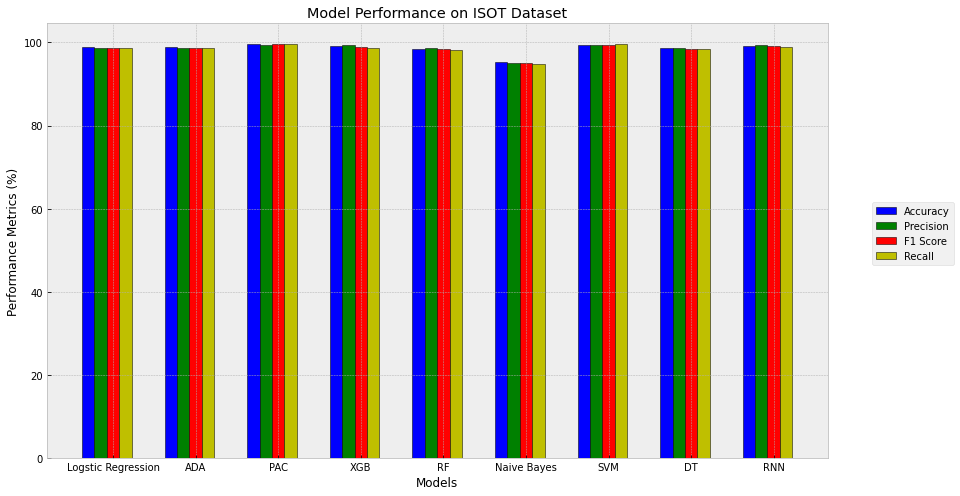

In [68]:
plt.figure(figsize=(14,8))
n= len(var_models)
r = np.arange(n)
width = 0.15

plt.bar(r, [i*100 for i in var_accuracy], color = 'b',
        width = width, edgecolor = 'black',
        label='Accuracy')
plt.bar(r + width, [i*100 for i in var_precision], color = 'g',
        width = width, edgecolor = 'black',
        label='Precision')
plt.bar(r + width*2,  [i*100 for i in var_f1score], color = 'r',
        width = width, edgecolor = 'black',
        label='F1 Score')
plt.bar(r + width*3,  [i*100 for i in var_recall], color = 'y',
        width = width, edgecolor = 'black',
        label='Recall')

plt.xlabel("Models")
plt.ylabel("Performance Metrics (%)")
plt.title("Model Performance on ISOT Dataset")

plt.xticks(r + width*2,var_models)
plt.legend(bbox_to_anchor = (1.05, 0.6))
  
plt.show()

<Figure size 1008x720 with 0 Axes>

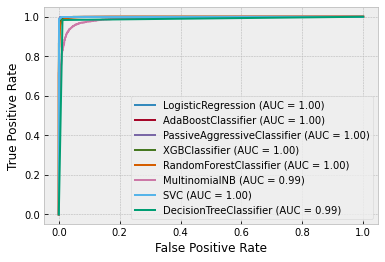

In [69]:
#plotting the roc curve
plt.figure(figsize=(14,10))
disp = plot_roc_curve(logistic_regression,X_test,y_test)
plot_roc_curve(ada_classifier,X_test,y_test,ax=disp.ax_)
plot_roc_curve(pac_classifier,X_test,y_test,ax=disp.ax_)
plot_roc_curve(xgb_classifier,X_test,y_test,ax=disp.ax_)
plot_roc_curve(rf,X_test,y_test,ax=disp.ax_)
plot_roc_curve(naive_classifier,X_test,y_test,ax=disp.ax_)
plot_roc_curve(svm_classifier,X_test,y_test,ax=disp.ax_)
plot_roc_curve(dt_clf,X_test,y_test,ax=disp.ax_)
plt.show()